<a href="https://colab.research.google.com/github/kaniz789/App_Rating-in-Playstore/blob/main/App_Rating_in_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for App rating in Playstore
## Questions:
1. What is the factor that affects app rating most ?

### Let's load the datasets first and go through the exploratory data analysis

### Importing the librarires with the datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from IPython.display import display, HTML
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px
import scipy.stats as stats

This dataset below appears to contain sentiment analysis results from user reviews of various mobile applications, with a total of 64295 entries. It has 5 columns:

1. App: The name of the application. All entries in this column are non-null, which means every row has a value for this feature. The data type is object, typically indicating string values.

2. Translated_Review: The translated version of the review. There are 37427 non-null entries for this feature, indicating a significant number of missing values. Its data type is object.

3. Sentiment: The general sentiment expressed in the review (e.g., Positive, Negative, Neutral). There are 37432 non-null entries in this column, again suggesting some missing values. Its data type is object.

4. Sentiment_Polarity: This is a metric that scores the sentiment from -1 (most negative) to 1 (most positive). There are 37432 non-null entries. The data type is float64, meaning it is a decimal number. The mean sentiment polarity is approximately 0.18, with a standard deviation of approximately 0.35. The minimum and maximum sentiment polarities are -1 and 1, respectively.

5. Sentiment_Subjectivity: This is a metric that scores the subjectivity from 0 (most objective) to 1 (most subjective). There are 37432 non-null entries. The data type is float64. The mean sentiment subjectivity is approximately 0.49, with a standard deviation of approximately 0.26. The minimum and maximum sentiment subjectivities are 0 and 1, respectively.


# **import csv files**

In [ ]:
googleplaystore = pd.read_csv('googleplaystore.csv')
user_reviews = pd.read_csv('googleplaystore_user_reviews.csv')

# **check through head() if all columns are able to appear**

In [ ]:
googleplaystore.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


In [ ]:
user_reviews.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


# **cheack through info()**

In [ ]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9366 entries, 0 to 9365
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 951.4+ KB


In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# **check through describe()**

In [ ]:
googleplaystore.describe()

,Rating,Reviews
count,9366.000000,9.366000e+03
mean,4.191757,5.140498e+05
std,0.515219,3.144042e+06
min,1.000000,1.000000e+00
25%,4.000000,1.862500e+02
50%,4.300000,5.930500e+03
75%,4.500000,8.153275e+04
max,5.000000,7.815831e+07


In [ ]:
user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


# **to see how many null values are there and then remove them**

In [ ]:
googleplaystore.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
user_reviews.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [ ]:
googleplaystore.dropna(inplace=True)
googleplaystore.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
user_reviews.dropna(inplace=True)
user_reviews.isnull().sum()

,0
App,0
Translated_Review,0
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0


# **to see how many duplicated values are there and then remove them**

In [ ]:
googleplaystore.duplicated().sum()

474

In [ ]:
googleplaystore.drop_duplicates(inplace=True)

In [ ]:
googleplaystore.duplicated().sum()

0

In [ ]:
user_reviews.duplicated().sum()

7735

In [ ]:
user_reviews.drop_duplicates(inplace=True)

In [ ]:
user_reviews.duplicated().sum()

0

# **to verify if number of entries = non-null count**

In [ ]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 9365
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   int64  
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 971.9+ KB


In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


# **to get all the column names**

In [ ]:
googleplaystore.columns.tolist()

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [ ]:
user_reviews.columns.tolist()

['App',
 'Translated_Review',
 'Sentiment',
 'Sentiment_Polarity',
 'Sentiment_Subjectivity']

# **dropping unnecessary columns**

In [ ]:
googleplaystore.drop(['Price', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

In [ ]:
googleplaystore.columns.tolist()

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Content Rating',
 'Genres']

In [ ]:
user_reviews.drop(['Translated_Review'], axis=1, inplace=True)

In [ ]:
user_reviews.columns.tolist()

['App', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']

# **final check through head()**

In [ ]:
googleplaystore.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone,Art & Design;Creativity


In [ ]:
user_reviews.head(5)

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000
5,10 Best Foods for You,Positive,1.00,0.300000


In [ ]:
# 1. Frequency of Sentiment in 20 Reviews:
sample_reviews = user_reviews.head(20)  # Take a sample of 20 reviews
sentiment_counts = user_reviews['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Positive    19015
Negative     6321
Neutral      4356
Name: count, dtype: int64


# **to see how many unique values are in Category, Genre, Content Rating ****

In [ ]:
googleplaystore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
googleplaystore['Category'].nunique()
print(f"Number of unique categories: {googleplaystore['Category'].nunique()}")

Number of unique categories: 33


In [ ]:
googleplaystore['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [ ]:
googleplaystore['Genres'].nunique()
print(f"Number of unique genres: {googleplaystore['Genres'].nunique()}")

Number of unique genres: 115


In [ ]:
googleplaystore['Category'].value_counts()

,count
Category,
FAMILY,1717
GAME,1074
TOOLS,733
PRODUCTIVITY,334
FINANCE,317
PERSONALIZATION,308
COMMUNICATION,307
LIFESTYLE,305
PHOTOGRAPHY,304


In [ ]:
googleplatstore_genres_counts = googleplaystore['Genres'].value_counts()
print(googleplatstore_genres_counts)

Genres
Tools                          732
Entertainment                  498
Education                      446
Action                         349
Productivity                   334
                              ... 
Casual;Music & Video             1
Board;Pretend Play               1
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Strategy;Creativity              1
Name: count, Length: 115, dtype: int64


In [ ]:
googleplaystore['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
googleplaystore['Content Rating'].nunique()
print(f"Number of unique content_rating: {googleplaystore['Content Rating'].nunique()}")

Number of unique content_rating: 6


In [ ]:
googleplaystore['Content Rating'].value_counts()

,count
Content Rating,
Everyone,7089
Teen,1022
Mature 17+,411
Everyone 10+,360
Adults only 18+,3
Unrated,1


# **Bar Plot : Top 15 Genres vs Number of Apps**

# getting Top 15 genres and their value counts

In [ ]:
# prompt: getting top 15 genres list and there value counts

top_15_genres = googleplaystore['Genres'].value_counts().head(15)
top_15_genres

,count
Genres,
Tools,732
Entertainment,498
Education,446
Action,349
Productivity,334
Finance,317
Personalization,308
Communication,307
Lifestyle,304


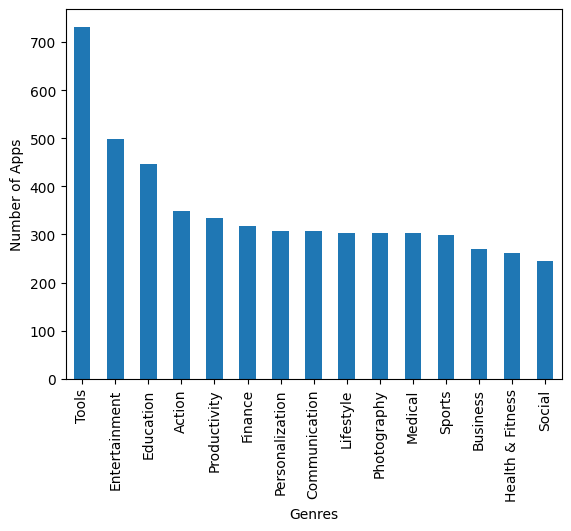

In [ ]:
googleplaystore['Genres'].value_counts().head(15).plot(kind='bar')
plt.ylabel('Number of Apps')
plt.show()

# **Bar Plot : Top 15 Category vs Frequency of each Genre**

# getting top 15 category list and there value counts

In [ ]:
# prompt: getting top 15 category list and there value counts

top_15_categories = googleplaystore['Category'].value_counts().head(10)
top_15_categories


,count
Category,
FAMILY,1717
GAME,1074
TOOLS,733
PRODUCTIVITY,334
FINANCE,317
PERSONALIZATION,308
COMMUNICATION,307
LIFESTYLE,305
PHOTOGRAPHY,304


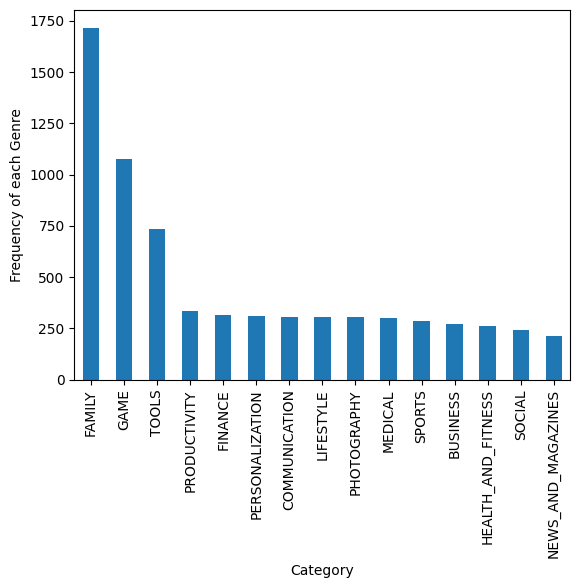

In [ ]:
googleplaystore['Category'].value_counts().head(15).plot(kind='bar')
plt.ylabel('Frequency of each Genre')
plt.show()

# **Stacked Bar Plot : Top 10 genres with content rating vs number of Apps**

In [ ]:
top_10_genres = googleplaystore['Genres'].value_counts().head(10).index

In [ ]:
filtered_df = googleplaystore[googleplaystore['Genres'].isin(top_10_genres)]

In [ ]:
genre_content_rating_counts = filtered_df.groupby(['Genres', 'Content Rating'])['App'].count().reset_index()
genre_content_rating_counts.rename(columns={'App': 'Count'}, inplace=True)

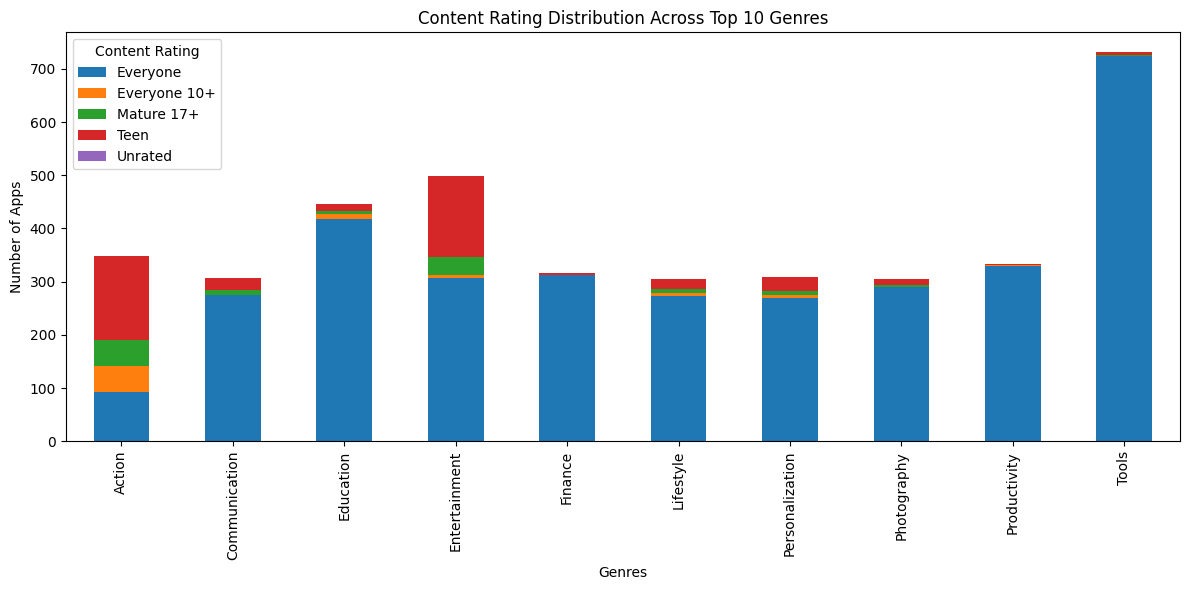

In [ ]:
# Group and aggregate the data
genre_content_rating_counts = filtered_df.groupby(['Genres', 'Content Rating'])['App'].count().unstack()

# Create the stacked bar plot
genre_content_rating_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Content Rating Distribution Across Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.legend(title='Content Rating')
plt.tight_layout()
plt.show()

# **Plotly Bar Plot or Grouped Bar Plot : Top 10 genres with content rating vs number of Apps**

In [ ]:
#genre_content_rating_counts = googleplaystore.groupby(['Genres', 'Content Rating'])['App'].count().reset_index()
#genre_content_rating_counts.rename(columns={'App': 'Count'}, inplace=True)

In [ ]:
# Get the top 10 genres
top_10_genres = googleplaystore['Genres'].value_counts().index[:10]

# Filter the DataFrame to include only the top 20 genres
filtered_df = googleplaystore[googleplaystore['Genres'].isin(top_10_genres)]

# Group and aggregate the filtered data
genre_content_rating_counts = filtered_df.groupby(['Genres', 'Content Rating'])['App'].count().reset_index()
genre_content_rating_counts.rename(columns={'App': 'Count'}, inplace=True)

In [ ]:
fig = px.bar(genre_content_rating_counts, x='Genres', y='Count', color='Content Rating',
             title='Content Rating Distribution Across Top 10 Genres and Number of Apps',
             barmode='group')  # Use 'group' for grouped bars
fig.show()

# **Scatter plot : with Rating and Reviews**

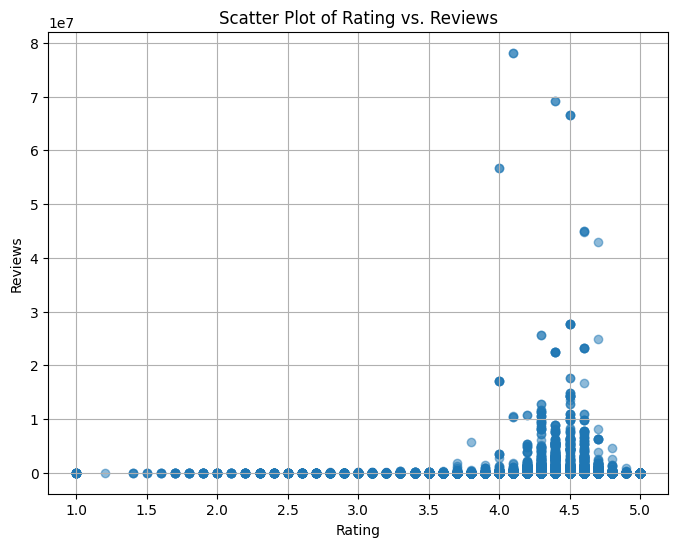

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'googleplaystore' DataFrame
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(googleplaystore['Rating'], googleplaystore['Reviews'], alpha=0.5)  # 'alpha' controls point transparency
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Scatter Plot of Rating vs. Reviews')
plt.grid(True)
plt.show()

# **Scatter Plot: Rating vs Installs**

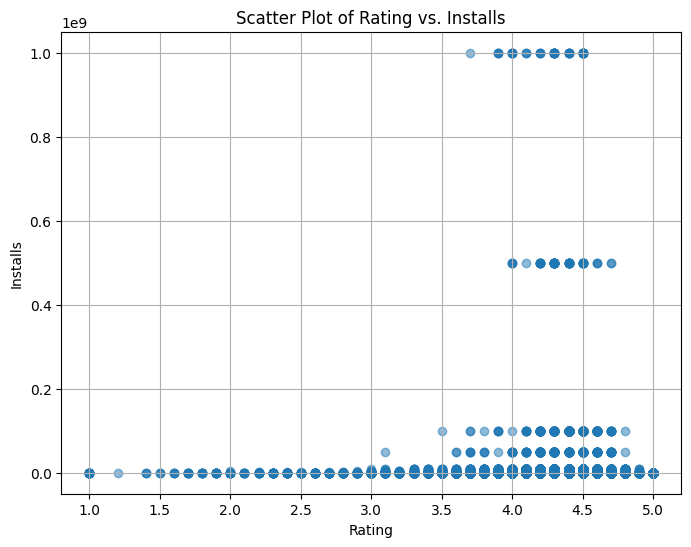

In [ ]:
# prompt: scatter plot with rating and installs

import pandas as pd
import matplotlib.pyplot as plt
# Convert 'Installs' column to numeric, handling errors
googleplaystore['Installs'] = googleplaystore['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
googleplaystore['Installs'] = pd.to_numeric(googleplaystore['Installs'], errors='coerce')

# Now create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(googleplaystore['Rating'], googleplaystore['Installs'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.title('Scatter Plot of Rating vs. Installs')
plt.grid(True)
plt.show()


# **Histogram Plot : Apps and Rating column**

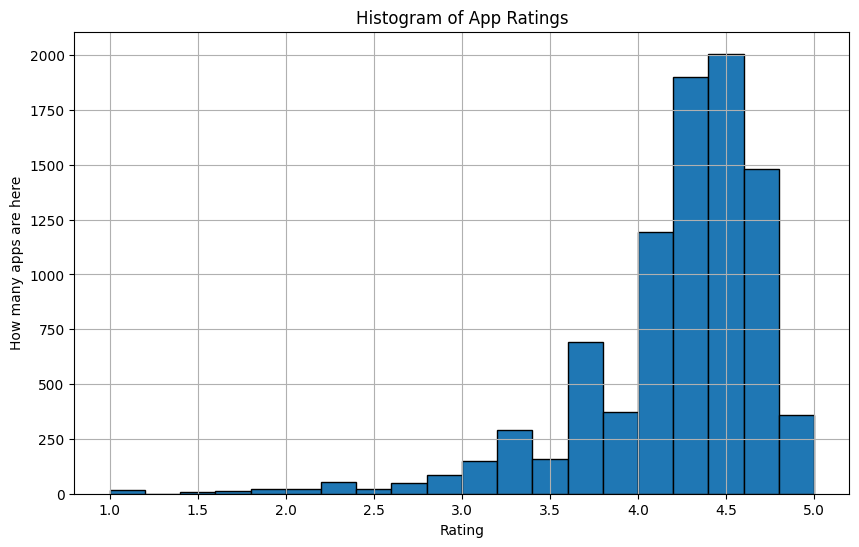

In [ ]:
# prompt: histogram plot with rating column

plt.figure(figsize=(10, 6))
plt.hist(googleplaystore['Rating'], bins=20, edgecolor='black') # Adjust bins as needed
plt.xlabel('Rating')
plt.ylabel('How many apps are here')
plt.title('Histogram of App Ratings')
plt.grid(True)
plt.show()


# **Normal Distribution Curve**

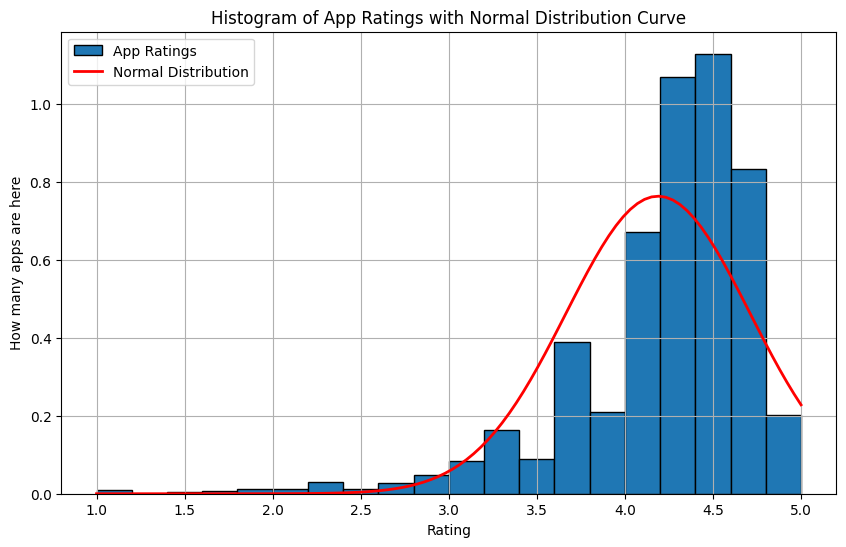

In [ ]:
# Plot the histogram
plt.figure(figsize=(10, 6))

plt.hist(googleplaystore['Rating'], bins=20, edgecolor='black', density=True, label='App Ratings')

# Fit a normal distribution to the data
mu, sigma = stats.norm.fit(googleplaystore['Rating'].dropna()) # dropna() handles missing values

# Create the normal distribution curve
x = np.linspace(googleplaystore['Rating'].min(), googleplaystore['Rating'].max(), 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, 'r-', linewidth=2, label='Normal Distribution')

plt.xlabel('Rating')
plt.ylabel('How many apps are here') # Changed to 'Density' for the curve
plt.title('Histogram of App Ratings with Normal Distribution Curve')
plt.grid(True)
plt.legend() # Display legend for labels
plt.show()

# **Normal Distribution with Sentiment polarity**

#Y-axis: Represents how many marbles of a particular size range you are likely to find in the bag (like the probability density of sentiment polarity scores).
---
# The y-axis values are derived from the distribution of those scores and represent probability density.
---
# The y-axis shows the relative likelihood of observing a sentiment polarity score within a given range.

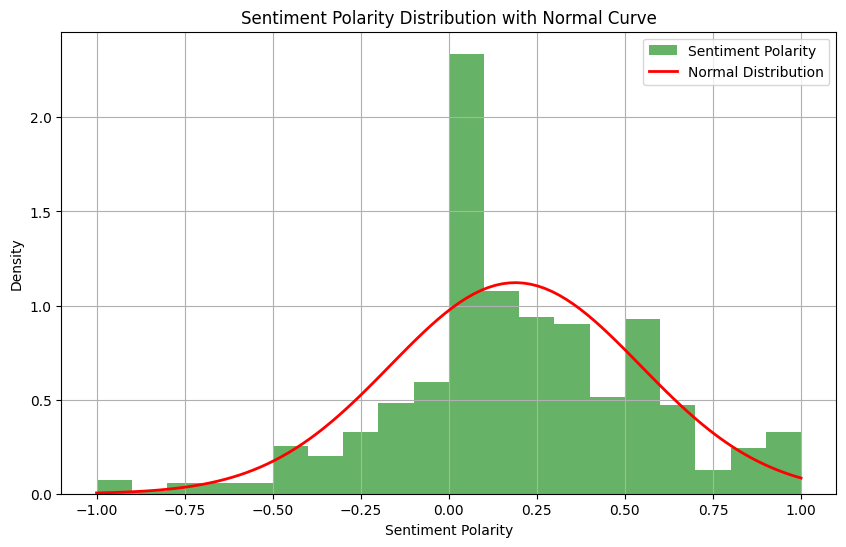

In [ ]:
# prompt: normal distribution with sentiment polarity plot

# Calculate mean and standard deviation
mu, sigma = stats.norm.fit(user_reviews['Sentiment_Polarity'].dropna())

# Create the normal distribution curve
x = np.linspace(user_reviews['Sentiment_Polarity'].min(), user_reviews['Sentiment_Polarity'].max(), 100)
y = stats.norm.pdf(x, mu, sigma)

# Plot the histogram and normal curve
plt.figure(figsize=(10, 6))
plt.hist(user_reviews['Sentiment_Polarity'], bins=20, density=True, alpha=0.6, color='g', label='Sentiment Polarity')
plt.plot(x, y, 'r-', linewidth=2, label='Normal Distribution')
plt.title('Sentiment Polarity Distribution with Normal Curve')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# **Box plot: Category vs Rating**

# In summary, whiskers help visualize the normal range of data, while outliers highlight potentially unusual or interesting data points that might require further analysis.

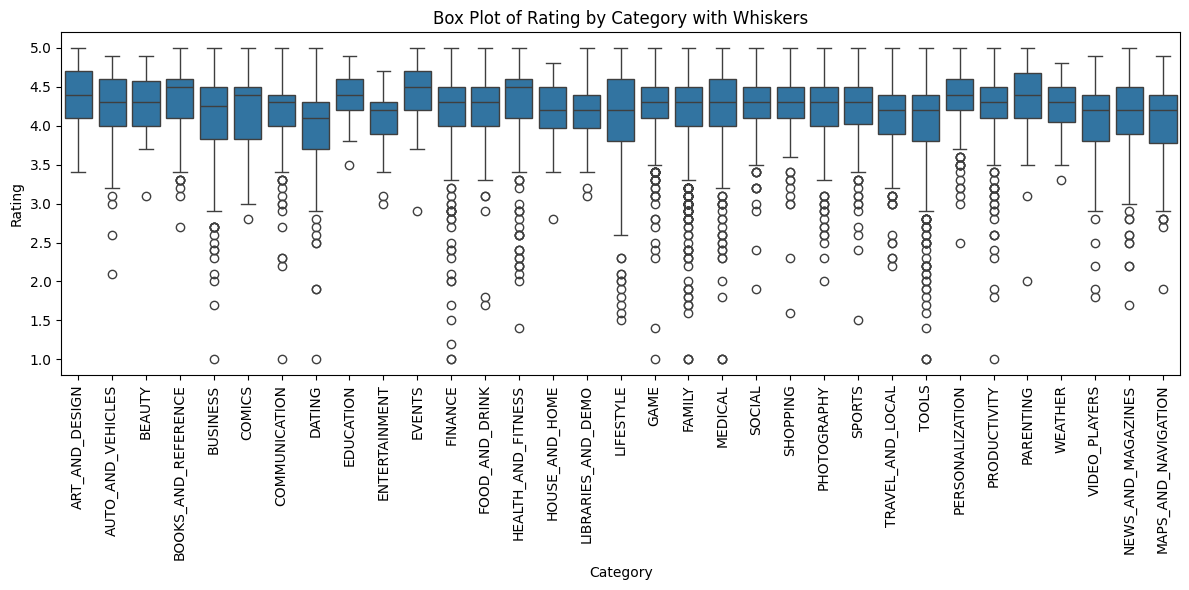

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x='Category', y='Rating', data=googleplaystore, whis=1.5)  # whis parameter controls whisker length
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot of Rating by Category with Whiskers')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# **Box Plot: Top 10 category vs Rating**

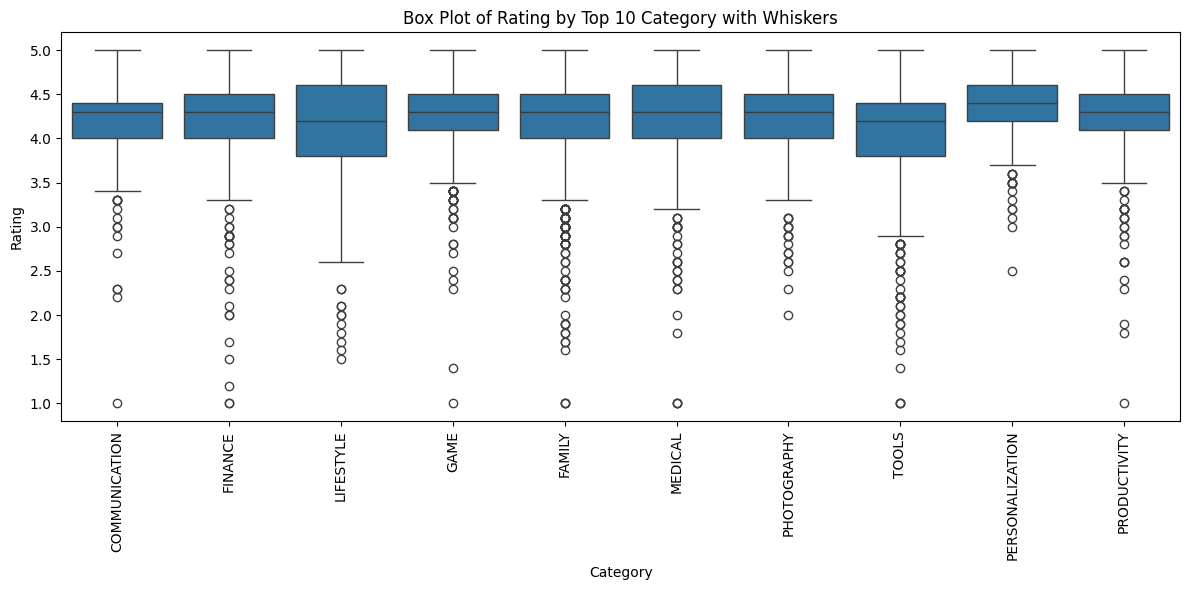

In [ ]:
# Get the top 10 categories
top_10_categories = googleplaystore['Category'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
filtered_df = googleplaystore[googleplaystore['Category'].isin(top_10_categories)]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=filtered_df, whis=1.5)
plt.xticks(rotation=90)
plt.title('Box Plot of Rating by Top 10 Category with Whiskers')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# **Box Plot: Rating vs Type**

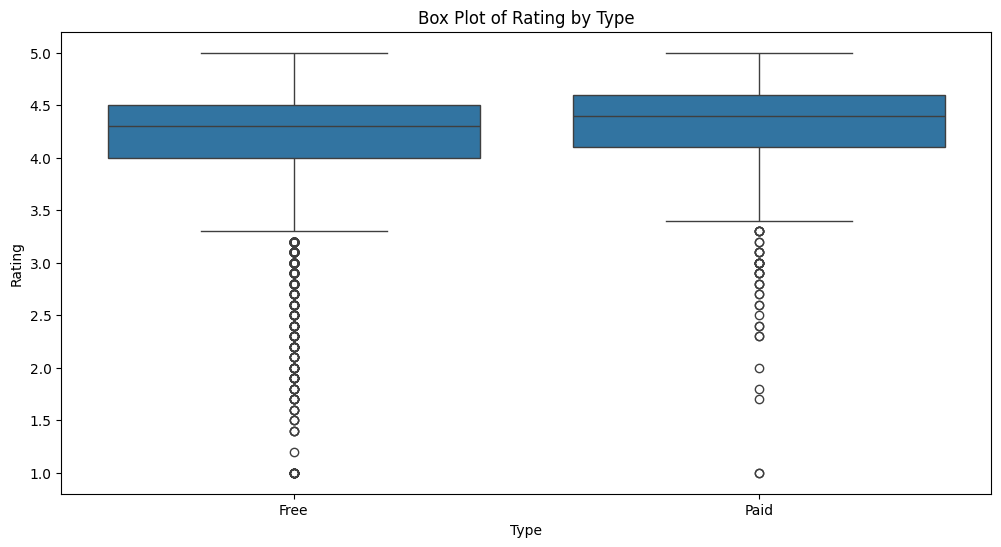

In [ ]:
# prompt: box plot with rating vs type

import matplotlib.pyplot as plt
# Box plot: Type vs Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Rating', data=googleplaystore)
plt.title('Box Plot of Rating by Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()


# **Box Plot: Content Rating vs Rating**

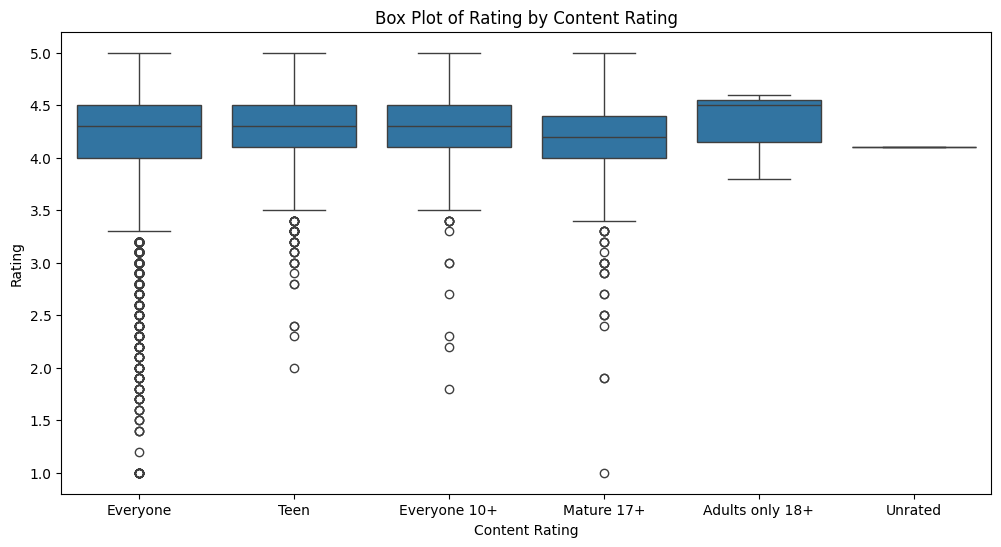

In [ ]:
# prompt: box plot with content rating and rating

import matplotlib.pyplot as plt
# Assuming 'googleplaystore' DataFrame is already loaded and processed

plt.figure(figsize=(12, 6))
sns.boxplot(x='Content Rating', y='Rating', data=googleplaystore)
plt.title('Box Plot of Rating by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.show()


## Summary : So, As per the exploratory data analysis's result we can say that App size and App reviews count has the most significant impact on app rating.
A few point to noted :
1. Event's category app tend to get better rating
2. Paid apps tend to get better rating
3. Adult rated apps tend to get better rating
4. Apps with multiple OS support tend to get better rating
5. Games and Daily tools tend to have better rating